In [1]:


import warnings
warnings.filterwarnings('ignore')



In [2]:
%matplotlib inline

import numpy as np
from numpy.random import randint, choice, normal, shuffle
import pandas as pd

from scipy.special import factorial

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sns.set_style('whitegrid')

In [4]:
def f(x, max_degree=9):
    taylor = [(-1)**i * x ** e / factorial(e) for i, e in enumerate(range(1, max_degree, 2))]
    return  np.sum(taylor, axis=0)


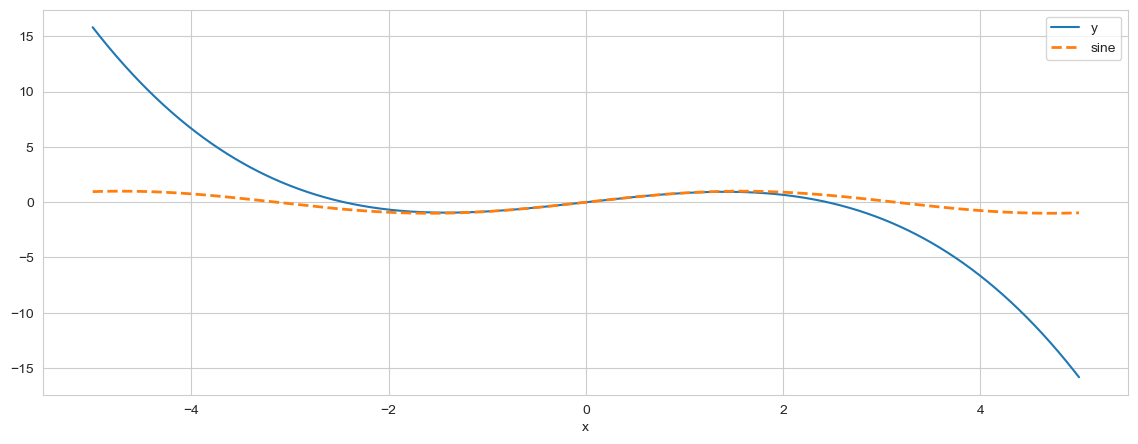

In [5]:
max_degree = 5
fig, ax = plt.subplots(figsize=(14, 5))
x = np.linspace(-5, 5, 1000)

data = pd.DataFrame({'y': f(x, max_degree), 'x': x})
data.plot(x='x', y='y', legend=False, ax=ax)
pd.Series(np.sin(x), index=x).plot(ax=ax, ls='--', lw=2, label='sine')
plt.legend();

In [6]:
from collections import defaultdict

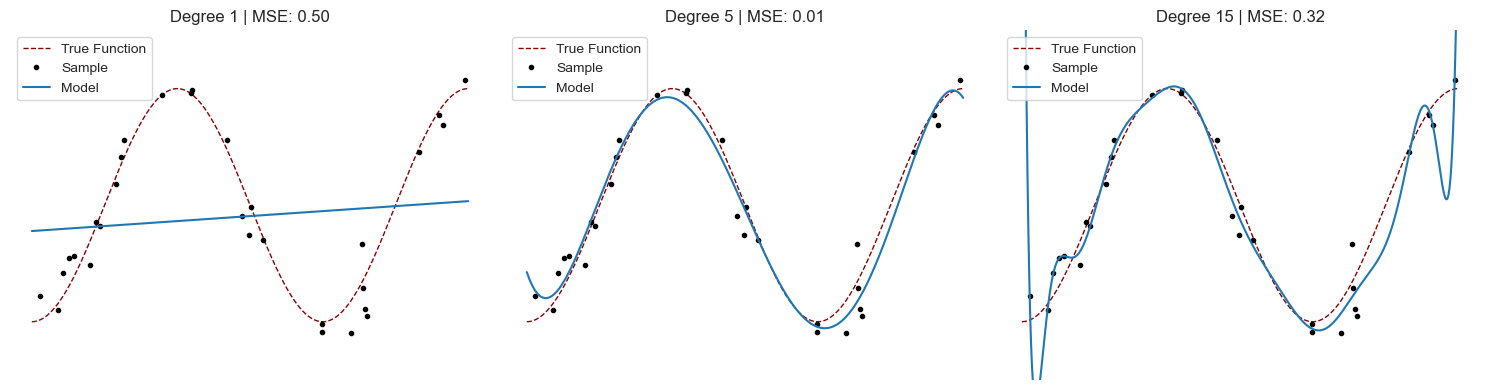

In [7]:


fig, axes = plt.subplots(ncols=3, figsize=(15, 4))
x = np.linspace(-.5 * np.pi, 2.5 * np.pi, 1000)
true_function = pd.Series(np.sin(x), index=x)
n = 30
noise = .2
degrees = [1, 5, 15]
x_ = np.random.choice(x, size=n)
y_ = np.sin(x_)
y_ +=  normal(loc=0, scale=np.std(y_) * noise, size=n)
mse = defaultdict(list)
for i, degree in enumerate(degrees):
    fit = np.poly1d(np.polyfit(x=x_, y=y_, deg=degree))
    true_function.plot(ax=axes[i], c='darkred', lw=1, ls='--', label='True Function')
    pd.Series(y_, index=x_).plot(style='.', label='Sample', ax=axes[i], c='k')
    pd.Series(fit(x), index=x).plot(label='Model', ax=axes[i])
    axes[i].set_ylim(-1.5, 1.5)
    mse = mean_squared_error(fit(x), np.sin(x))
    axes[i].set_title(f'Degree {degree} | MSE: {mse:,.2f}')
    axes[i].legend()
    axes[i].grid(False)
    axes[i].axis(False)

sns.despine()
fig.tight_layout();

